In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from meerkat import bme680, tools
from meerkat.base import TimePiece

In [3]:
from importlib import reload

In [4]:
def bp(x):
    return tools.bprint(x, n=8)

In [5]:
tp = TimePiece()

In [6]:
reload(bme680)
dev = bme680.BME680(bus_n=1)

In [7]:
dev.read_calibration()

1. Set humidty oversample
2. Set temperature oversample
3. Set pressure oversample

In [8]:
dev.set_oversampling(h=1, t=2, p=16)

4. Set gas wait time with gas_wait_0 to 0x59 = 100ms

In [9]:
wait = dev.calc_wait_time(t=25, x=4)
print(wait, hex(wait))

89 0x59


In [10]:
dev.set_gas_wait(n=0, value=wait)

5. Set heater set-point with res_heat_0, 150 C here

In [11]:
resistance = dev.calc_res_heat(target_temp=150)
resistance

151

In [12]:
dev.set_res_heat(n=0, value=resistance)

6. Set nb_conv to the 0 profile used in steps 4 and 5

In [13]:
dev.nb_conv = 0

7. Set run_gas to 1 to enable gas measurements

In [14]:
dev.gas_on()

8. Set mode to 0b01 to trigger a single forced mode measurement

In [15]:
dev.forced_mode()

In [16]:
%%time
dev.measure()
t = dev.temperature()
p = dev.pressure()
h = dev.humidity()
print("T: ", t)
print("P: ", p)
print("RH:", h)
#dev.setup_gas(t_ms=40, x=4, t_c=150)

T:  19.1469921875
P:  1003.2034217157541
RH: 40.88439942020818
CPU times: user 35.9 ms, sys: 0 ns, total: 35.9 ms
Wall time: 348 ms


In [17]:
%%time
t = dev.temperature()
p = dev.pressure()
h = dev.humidity()

CPU times: user 144 µs, sys: 0 ns, total: 144 µs
Wall time: 362 µs


In [18]:
print("T: ", t)
print("P: ", p)
print("RH:", h)

T:  19.1469921875
P:  1003.2034217157541
RH: 40.88439942020818


In [19]:
dev._range_switch_error

243

In [20]:
%%time
g = dev.gas()

CPU times: user 140 µs, sys: 22 µs, total: 162 µs
Wall time: 196 µs


In [21]:
g

(4483.370327089864, 185, 11, 83303628, 72588492)

In [67]:
fp = "test_5.csv"
hrs = 24   # hours
delay = 1 # seconds
with open(fp, 'a') as f:
    while True:
        dev.forced_mode()
        dev.measure()
        t = dev.temperature()
        p = dev.pressure()
        h = dev.humidity()
        g = dev.gas()

        d = [tp.std_time(), t,p,h] + list(g) + [dev._gas_valid, dev._heat_stab]
        d = [str(_x) for _x in d]
        d_line = ",".join(d)
        f.write(d_line + "\n")
        time.sleep(delay)
        if c > ((hrs * 60 * 60 )/ delay):
            break

KeyboardInterrupt: 

In [55]:
df1 = pd.read_csv("test_1.csv", names=["dt", 
                                 "t", "p", "h", 
                                 "gas_res", "adc_gas", "adc_gas2", "v1", "v2", 
                                 "valid", "stable"])
df1.dt = pd.to_datetime(df1.dt)

In [56]:
df2 = pd.read_csv("test_2.csv", names=["dt", 
                                 "t", "p", "h", 
                                 "gas_res", "adc_gas", "adc_gas2", "v1", "v2", 
                                 "valid", "stable"])
df2.dt = pd.to_datetime(df2.dt)

In [62]:
df3 = pd.read_csv("test_3.csv", names=["dt", 
                                 "t", "p", "h", 
                                 "gas_res", "adc_gas", "adc_gas2", "v1", "v2", 
                                 "valid", "stable"])
df3.dt = pd.to_datetime(df3.dt)

In [68]:
df4 = pd.read_csv("test_4.csv", names=["dt", 
                                 "t", "p", "h", 
                                 "gas_res", "adc_gas", "adc_gas2", "v1", "v2", 
                                 "valid", "stable"])
df4.dt = pd.to_datetime(df4.dt)

In [69]:
df = pd.concat([df1, df2, df3, df4], axis=0)

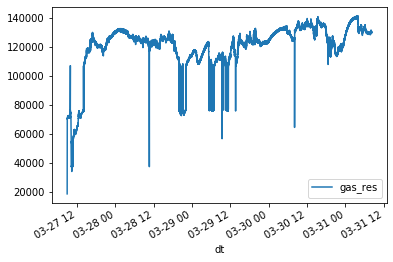

In [70]:
df[["dt", "gas_res"]].plot(x="dt");

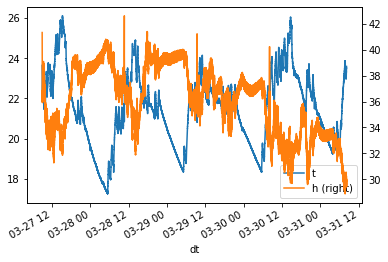

In [71]:
df[["dt", "t", "h"]].plot(x="dt", secondary_y="h");

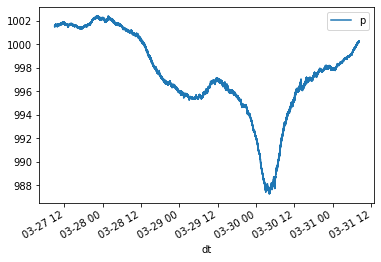

In [72]:
df[["dt", "p"]].plot(x="dt");